In [5]:
import matplotlib.pyplot as plt
import numpy as np
import torch as t
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from PCA import classify_sym, type_to_color
import matplotlib as mpl
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'
%matplotlib inline

In [6]:
unitaries_prods = np.load("/Users/jonathanlu/Documents/symmetry-learning/data/PCA/3GHZ-PCA-unitaries.npy")
NRUN, NUM_QUBITS = unitaries_prods.shape[:2]
sym_labels = np.array([type_to_color(classify_sym(np.abs(unitary_prod))) \
                            for unitary_prod in unitaries_prods])
print(f"{NRUN} symmetries on a {NUM_QUBITS}-qubit state")

100 symmetries on a 3-qubit state


In [7]:
# Project from the Lie group to 2D space
unitary_vecs = StandardScaler().fit_transform(np.abs(unitaries_prods.reshape((NRUN, -1))))
pca = PCA(n_components=2)
fit = pca.fit_transform(unitary_vecs)
explained_variance = pca.explained_variance_ratio_
print(f"PCA explained variance ratio = {explained_variance}")

PCA explained variance ratio = [9.99999999e-01 2.28823119e-10]


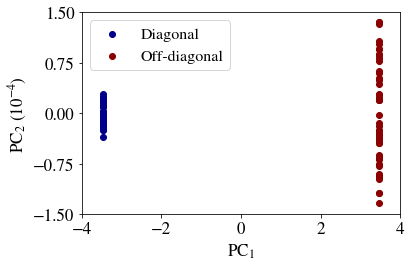

In [21]:
FONT_SIZE = 17
plt.rc('font', size=16)
plt.xlabel(r'PC$_1$', fontsize=FONT_SIZE)
plt.ylabel(r'PC$_2$ ($10^{-4}$)', fontsize=FONT_SIZE)
clab = [('darkblue', 'Diagonal'), ('darkred', 'Off-diagonal')]
for color, label in clab:
    idxs = np.where(sym_labels == color)
    plt.scatter(fit[idxs,0], fit[idxs,1] * 10**4, c=color, label=label)
plt.legend()
plt.xticks([-4, -2, 0, 2, 4], fontsize=FONT_SIZE)
plt.yticks(np.array([-1.5, -0.75, 0, 0.75, 1.5]), fontsize=FONT_SIZE)
plt.tight_layout()
plt.savefig("/Users/jonathanlu/Documents/data_sym/PCA.pdf")